<a href="https://colab.research.google.com/github/thetrotfreak/MCA572/blob/cv/2347111_CV_ETE_1_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ETE 1

> Bivas Kumar

> 2347111

## Load Image

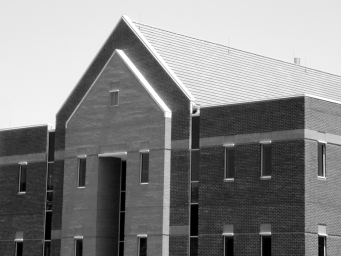

In [75]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Fig1025(a)(building_original).tif', cv2.COLOR_BGR2GRAY)

# Check and display if the image was loaded successfully
if img is not None:
  r = 256.0 / img.shape[0]
  dim = (int(img.shape[1] * r), 256)
  # perform the resizing using cv2.resize
  rimg = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
  cv2_imshow(rimg)

## DFT

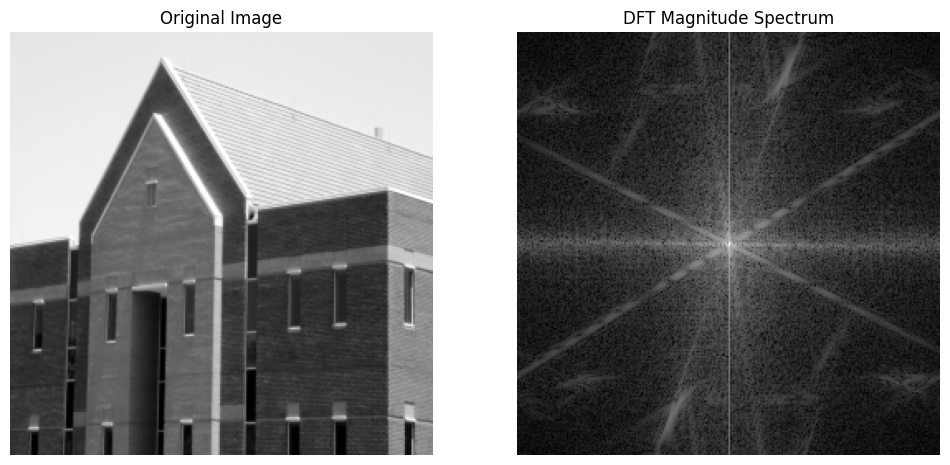

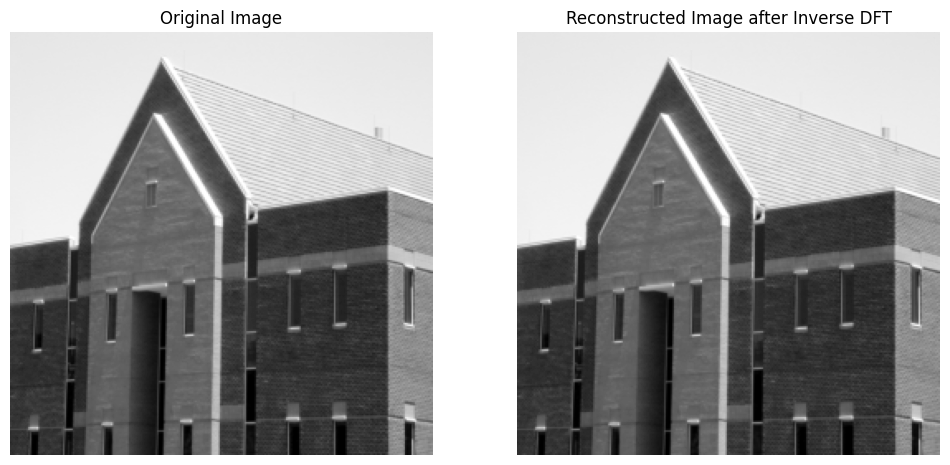

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.io import imread
from skimage.transform import resize

image = resize(img, (256, 256))  # Resize the image, to easily fit in PDF

# Apply FFT (Discrete Fourier Transform) and shift zero frequency to center
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

# Compute magnitude spectrum for visualization
magnitude_spectrum = np.log(np.abs(dft_shift) + 1)

# Visualize the original image and magnitude spectrum
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('DFT Magnitude Spectrum')
plt.axis('off')

plt.show()

# Reconstruct the image using Inverse FFT
dft_inverse = np.fft.ifft2(np.fft.ifftshift(dft_shift))
reconstructed_image_dft = np.abs(dft_inverse)

# Visualize the reconstructed image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image_dft, cmap='gray')
plt.title('Reconstructed Image after Inverse DFT')
plt.axis('off')

plt.show()

- Here, the $DFT,\;then\;IFT$ will not change the original image, since we did not apply any transformations in the frequncey domain.

- We only moved from spatial to frequnecy and back to spatial domain.

## DWT

In [ ]:
!pip install PyWavelets

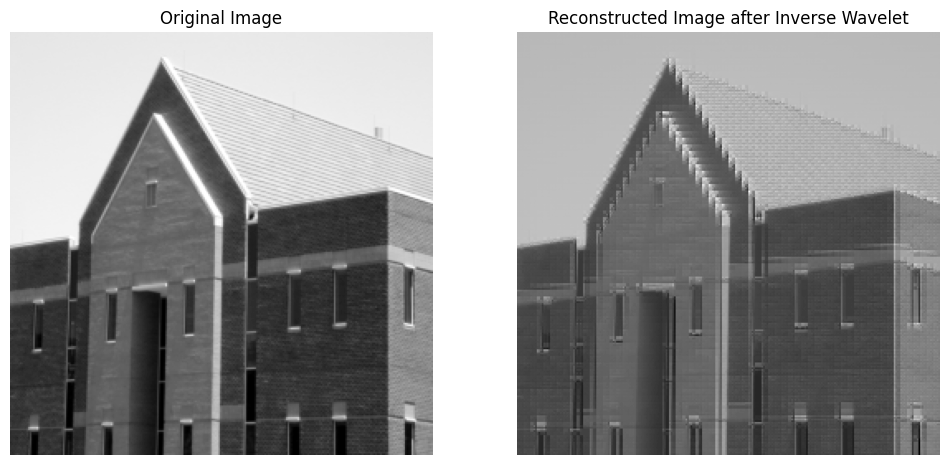

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from skimage import data, color
from skimage.transform import resize

image = resize(img, (256, 256))

# Apply 2D Discrete Wavelet Transform (DWT) using Haar wavelet
wavelet = 'haar'
coeffs_level1 = pywt.dwt2(image, wavelet)  # Level 1 decomposition
LL1, (LH1, HL1, HH1) = coeffs_level1

coeffs_level2 = pywt.dwt2(LL1, wavelet)  # Level 2 decomposition
LL2, (LH2, HL2, HH2) = coeffs_level2

LH1 = np.abs(LH1)
HL1 = np.abs(HL1)
HH1 = np.abs(HH1)
LH2 = np.abs(LH2)
HL2 = np.abs(HL2)
HH2 = np.abs(HH2)

# Reconstruct the image using inverse DWT (level 2 then level 1)
reconstructed_image_level2 = pywt.idwt2((LL2, (LH2, HL2, HH2)), wavelet)
reconstructed_image_dwt = pywt.idwt2((reconstructed_image_level2, (LH1, HL1, HH1)), wavelet)

# Compare the original and reconstructed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image_dwt, cmap='gray')
plt.title('Reconstructed Image after Inverse Wavelet')
plt.axis('off')

plt.show()

- Here, the reconstructed image after $DWT\;(via\;IDWT)$ has lost some details like edges (jagged) and color intensity due the nature of $Wavelet\;Transformation.$
- Since, wavelets capture an approximation of the signals to capture both time and frequency, in order to compensate for $Heisenberg's\;Uncertainity\;Principle.$

## Comparison

In [ ]:
import numpy as np

def mse(imageA, imageB):
    """Function to compute Mean Squared Error (MSE)"""
    return np.mean((imageA - imageB) ** 2)

def psnr(original, reconstructed):
    """Function to compute PSNR"""
    mse_value = mse(original, reconstructed)
    if mse_value == 0:
        return float('inf')  # If the images are identical, PSNR is infinite
    max_pixel = 1.0  # Since the image is normalized between 0 and 1
    psnr_value = 10 * np.log10(max_pixel**2 / mse_value)
    return psnr_value

# Calculate PSNR for DFT-reconstructed image
psnr_dft = psnr(img, reconstructed_image_dft)

# Calculate PSNR for Wavelet-reconstructed image
psnr_wavelet = psnr(img, reconstructed_image_dwt)

print(f"PSNR (DFT-reconstructed image): {psnr_dft:.2f} dB")
print(f"PSNR (Wavelet-reconstructed image): {psnr_wavelet:.2f} dB")

PSNR (DFT-reconstructed image): 314.31 dB
PSNR (Wavelet-reconstructed image): 21.93 dB


## Visualization

> DWT

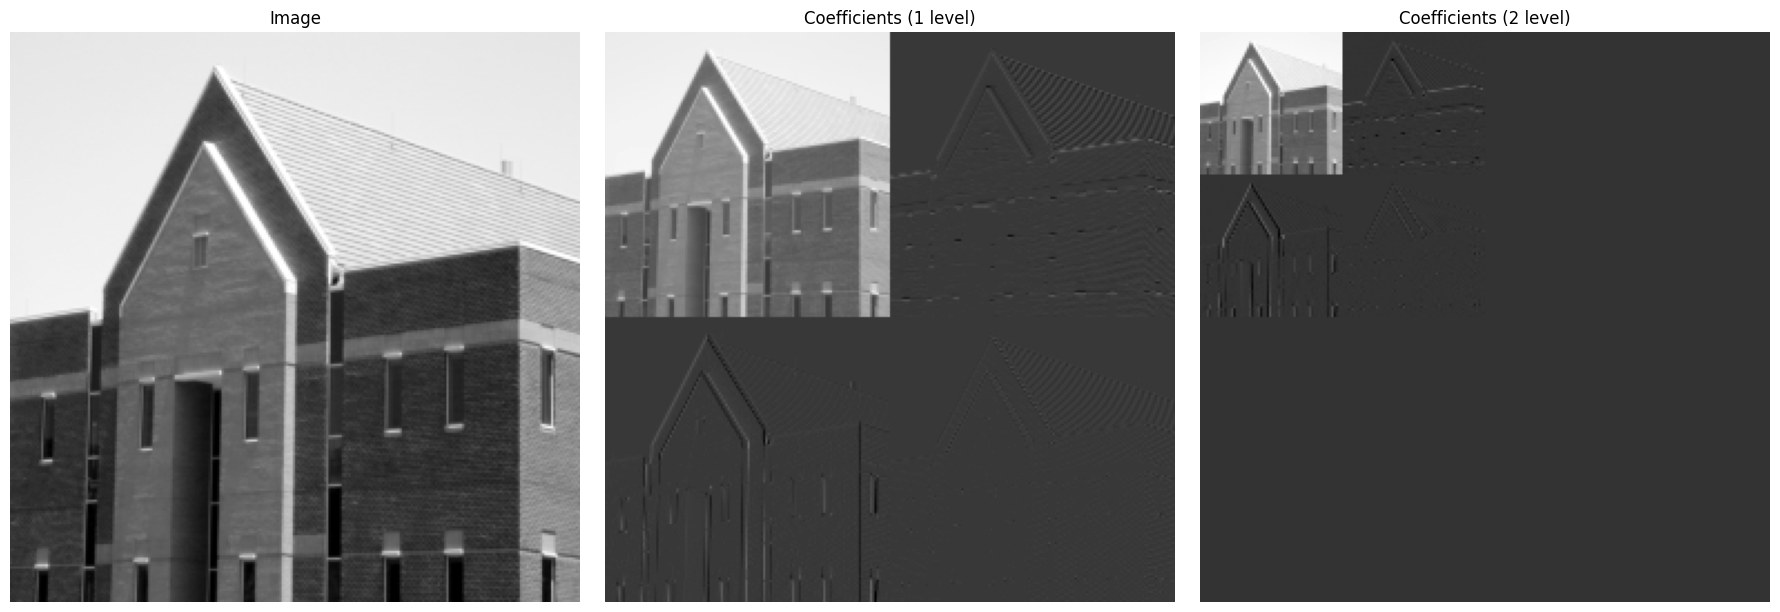

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from skimage import data, color
from skimage.transform import resize

# Load and preprocess the image (resize for simplicity)
image = resize(img, (256, 256))      # Resize to 256x256 for simplicity

# Perform 2-level wavelet decomposition using Haar wavelet
wavelet = 'haar'
coeffs_level1 = pywt.dwt2(image, wavelet)  # Level 1 decomposition
LL1, (LH1, HL1, HH1) = coeffs_level1

coeffs_level2 = pywt.dwt2(LL1, wavelet)  # Level 2 decomposition
LL2, (LH2, HL2, HH2) = coeffs_level2

# Create the visualization similar to the example
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Display the original image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Image')
axes[0].axis('off')

# Create a new image that shows the level 1 decomposition
# Top-left: Approximation (LL1), Top-right: Horizontal (LH1), Bottom-left: Vertical (HL1), Bottom-right: Diagonal (HH1)
level1_coeffs_image = np.vstack([
    np.hstack([LL1, LH1]),
    np.hstack([HL1, HH1])
])
axes[1].imshow(level1_coeffs_image, cmap='gray')
axes[1].set_title('Coefficients (1 level)')
axes[1].axis('off')

# Create a new image that shows the level 2 decomposition on LL1
# Top-left: Approximation (LL2), Top-right: Horizontal (LH2), Bottom-left: Vertical (HL2), Bottom-right: Diagonal (HH2)
level2_coeffs_image = np.vstack([
    np.hstack([LL2, LH2]),
    np.hstack([HL2, HH2])
])
# Merge with level 1 for a full visualization
full_level2_image = np.vstack([
    np.hstack([level2_coeffs_image, np.zeros_like(LH1)]),
    np.hstack([np.zeros_like(HL1), np.zeros_like(HH1)])
])

axes[2].imshow(full_level2_image, cmap='gray')
axes[2].set_title('Coefficients (2 level)')
axes[2].axis('off')

plt.tight_layout()
plt.show()